In [1]:
""" 
Analyse sequential samples in stream sampled by ClipSampler in user streams.
Per user we display the actual input-video in the stream + show the labels and meta-data.
"""
import pandas as pd
import numpy as np
from collections import Counter
import os.path as osp
import json
import matplotlib.pyplot as plt
import pickle

# Print all variables on their own lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)


In [2]:
"""First run dataset saving script that saves all per-sample entries in the stream."""

TRAIN_MODE = 'pretrain'

if TRAIN_MODE == 'train':
    train_usersummary_file_nooverlap = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/summarize_streams/logs/2022-08-04_18-05-40_UID8f0427cb-8048-47d5-b70e-bc3878a1cb3a/dataset_entries_train_ego4d_LTA_train_usersplit_10users_pickle.ckpt"
    train_usersummary_file_1s_stride = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/exps/ego4d_action_recog/summarize_streams/../../..//results/ego4d_action_recog/summarize_streams/logs/2022-08-05_14-42-08_UID91c63b64-d6ee-4962-a83b-aeaaf4df7ccf/dataset_entries_train_ego4d_LTA_train_usersplit_10users.ckpt"
    train_usersummary_file_nooverlap_include_videpaths = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/exps/ego4d_action_recog/summarize_streams/../../..//results/ego4d_action_recog/summarize_streams/logs/2022-09-06_18-43-43_UIDc4605fd4-8f70-4fcd-bee2-e16b5dd22820/dataset_entries_train_ego4d_LTA_train_usersplit_10users.ckpt"
    FILE_TO_ANALYZE = train_usersummary_file_nooverlap_include_videpaths

elif TRAIN_MODE == 'test':
    test_usersummary_file_nooverlap_include_videpaths="/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/summarize_streams/logs/2022-10-07_04-33-34_UIDd679068a-dc6e-40ff-b146-70ffe0671a97/dataset_entries_test_FEWSHOT=False_ego4d_LTA_test_usersplit_40users.ckpt"
    FILE_TO_ANALYZE = test_usersummary_file_nooverlap_include_videpaths

elif TRAIN_MODE == 'pretrain':
    pretrain_unsegmented_json = '/fb-agios-acai-efs/mattdl/data/ego4d_lta_usersplits/2022-09-08_17-17-16_ego4d_LTA_usersplit/ego4d_LTA_pretrain_incl_nanusers_usersplit_148users.json'
    FILE_TO_ANALYZE = pretrain_unsegmented_json


# Train/test are segmented in 2s clips for online learning
if TRAIN_MODE in ['train','test']: # Pickle
    with open(FILE_TO_ANALYZE, 'rb') as f:
        ds = pickle.load(f)
#     analyze_obj = json.load(p)
    
    CUSTOM_VIDEO_PLAY_LENGTH_SEC = None # Play the start-end 2s
    clip_start_key = 'clip_start_sec'
    clip_end_key = 'clip_end_sec'
    user_key = 'user_id'
    scenarios_key = 'parent_video_scenarios'

    def video_path_fetch_fn(entry):
        return entry['video_path']

# Pretrain uses original ego4d action-annotations
else: # JSON
    with open(pretrain_unsegmented_json, 'r') as f:
        ds = json.load(f)['users']
    
    CUSTOM_VIDEO_PLAY_LENGTH_SEC = 0.4 # Play 1 sec instead of start to end
    clip_start_key = 'action_clip_start_sec'
    clip_end_key = 'action_clip_end_sec'
    user_key = 'fb_participant_id'
    scenarios_key = 'parent_video_scenarios'

    video_parent_path ="/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/forecasting/data/long_term_anticipation/clips_root_local/clips"
    
    def video_path_fetch_fn(entry):
        return osp.join(video_parent_path,f'{entry["clip_uid"]}.mp4')
    

'First run dataset saving script that saves all per-sample entries in the stream.'

In [3]:
all_users = list(ds.keys())
all_users

['26',
 '50',
 '442',
 '13',
 '103',
 '341',
 '9',
 '67',
 '275',
 '374',
 '362',
 '81',
 '277',
 '363',
 '64',
 '47',
 '437',
 '438',
 '441',
 '89',
 '462',
 '56',
 '356',
 '294',
 '425',
 '377',
 '87',
 '42',
 '329',
 '52',
 '428',
 '282',
 '276',
 '82',
 '12',
 '107',
 '115',
 '270',
 '450',
 '269',
 '92',
 '266',
 '440',
 '83',
 '367',
 '41',
 '360',
 '293',
 '122',
 '460',
 '130',
 '350',
 '152',
 '423',
 '291',
 '366',
 '14',
 '281',
 '43',
 '292',
 '163',
 '127',
 '463',
 '48',
 '429',
 '449',
 '296',
 '455',
 '15',
 '375',
 '125',
 '46',
 '8',
 '286',
 '173',
 '54',
 '420',
 '322',
 '128',
 '40',
 '98',
 '443',
 '189',
 '427',
 '180',
 '95',
 '368',
 '119',
 '199',
 '88',
 '112',
 '464',
 '80',
 '60',
 '434',
 '72',
 '426',
 '109',
 '298',
 '432',
 '295',
 '465',
 '71',
 '70',
 '66',
 '290',
 '106',
 '424',
 '466',
 '185',
 '468',
 '267',
 '371',
 '49',
 '113',
 '179',
 '302',
 '184',
 '372',
 '273',
 '357',
 '264',
 '328',
 '213',
 '422',
 '458',
 '158',
 '198',
 '289',
 '263'

In [8]:
SELECTED_USER = '8'

"""Single entry looks like:"""
ds[SELECTED_USER][0]

'Single entry looks like:'

{'video_uid': 'f6da2935-f18d-4ef4-9a50-8890d1cf796a',
 'clip_uid': 'fbf4150a-27d2-48a4-956f-b4f85ecde465',
 'clip_parent_start_sec': 1192.0,
 'clip_parent_end_sec': 1319.57,
 'clip_parent_start_frame': 35760,
 'clip_parent_end_frame': 39587,
 'interval_start_frame': 36000,
 'interval_end_frame': 39587,
 'interval_start_sec': 1200.0,
 'interval_end_sec': 1319.57,
 'verb': 'paint',
 'noun': 'cardboard_(cardboard,_paperboard)',
 'action_clip_start_sec': 4.5,
 'action_clip_end_sec': 12.5,
 'action_clip_start_frame': 135,
 'action_clip_end_frame': 375,
 'clip_id': 1725,
 'action_idx': 0,
 'verb_label': 53,
 'noun_label': 68,
 'fb_participant_id': 8.0,
 'parent_video_scenarios': ['Crafting/knitting/sewing/drawing/painting'],
 'origin_video_id': 'unict_017_0109'}

  2%|███                                                                                                                                                      | 1/51 [00:00<00:00, 567.26it/s]

Fetching video: /home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/forecasting/data/long_term_anticipation/clips_root_local/clips/fbf4150a-27d2-48a4-956f-b4f85ecde465.mp4
(entry 1) USER 8.0: 10.0s-10.4s, action_idx=1
LABEL	put_(place,_leave,_drop)-paintbrush
SCENARIO	['Crafting/knitting/sewing/drawing/painting']


True

True

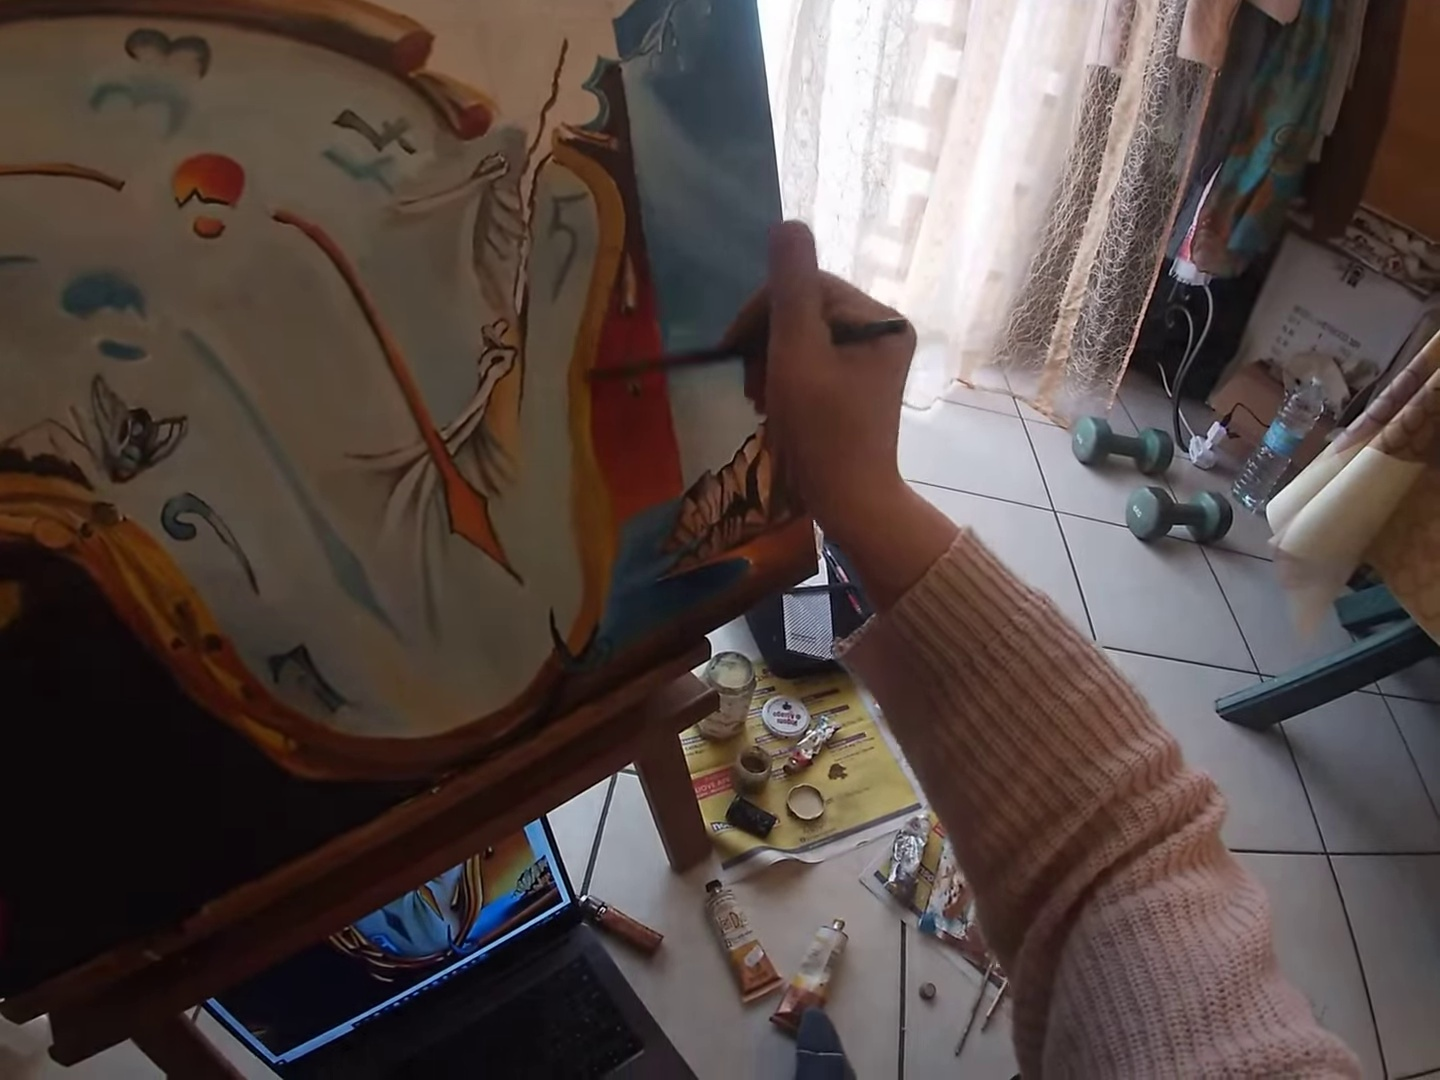

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
# InteractiveShell.ast_node_interactivity = "all"
from tqdm import tqdm

def draw_label(img, text, pos, bg_color):
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.8
    color = (255, 0, 0)
    thickness = cv2.FILLED
    margin = 2
    txt_size = cv2.getTextSize(text, font_face, scale, thickness)

    end_x = pos[0] + txt_size[0][0] + margin
    end_y = pos[1] - txt_size[0][1] - margin

    cv2.rectangle(img, pos, (end_x, end_y), bg_color, thickness)
    cv2.putText(img, text, pos, font_face, scale, color, 1, cv2.LINE_AA)


user_sequence = ds[SELECTED_USER]
pbar = tqdm(total=len(user_sequence))

initial = True
entry_idx = 0
cmd = None


while cmd != 'q':
    
    if initial:
        cmd='r' # Replay first instance
        initial=False
    else:
        cmd = input()
    
    try:
        cmd = int(cmd)
        entry_idx = cmd
        print(f"Playing from annotation number entry idx: {entry_idx}")
    except:
        if cmd == 'n':
            entry_idx+=1
            print(f'Playing next video:{entry_idx}')
        elif cmd == 'p':
            entry_idx-=1
            print(f'Playing previous video:{entry_idx}')
        elif cmd == 'r':
            print(f'Replaying video {entry_idx}')
        elif cmd == 'q':
            print('Quiting video watcher')
            break
        else:
            raise ValueError('cmd not recognized')
    
    # Overwrite previous output of video and label
    pbar.reset()
    clear_output(wait=True)
    
    entry = user_sequence[entry_idx]
    video_path = video_path_fetch_fn(entry)
    clip_start_msec = entry[clip_start_key] * 1000
    if CUSTOM_VIDEO_PLAY_LENGTH_SEC is None:
        clip_end_msec = entry[clip_end_key] * 1000
    else:
        clip_end_msec = clip_start_msec + CUSTOM_VIDEO_PLAY_LENGTH_SEC * 1000
    print(f"Fetching video: {video_path}")
    
#     'clip_start_sec': 4.887695266666682,
#      'clip_end_sec': 7.021028600000015,
#      'noun_label': 97,
#      'verb_label': 34,
#      'action_idx': 0,
#      'parent_video_scenarios': ['Cleaning / laundry'],
#      'user_id': '104.0',
        
    info_str = "(entry {}) USER {}: {:.1f}s-{:.1f}s, action_idx={}".format(
        entry_idx,
        entry[user_key],
        entry[clip_start_key],
        clip_end_msec/1000,
        entry['action_idx'],

    )
    print(info_str)
    print("LABEL\t{}-{}".format(entry['verb'],entry['noun'],))
    print("SCENARIO\t{}".format(entry[scenarios_key], ))
    pbar.update(entry_idx)
    pbar.refresh()
    
    # Video
    # See API to set video start/end times: https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d
    video = cv2.VideoCapture(video_path)
    video.set(cv2.CAP_PROP_POS_MSEC, clip_start_msec)
    display_handle=display(None, display_id=True)
    
    try:
        while video.get(cv2.CAP_PROP_POS_MSEC) <= clip_end_msec:
            _, frame = video.read()
            _, frame = cv2.imencode('.jpeg', frame)
    
            draw_label(frame,"HELLOW", (50,50),(255,0,0))
            display_handle.update(Image(data=frame.tobytes()))
    except KeyboardInterrupt:
        break
    finally:
        video.release()

display_handle.update(None)
pbar.close()
        

In [ ]:
"""
Interesting examples:

## Some examples are extremely hard as action is out-of-focus



### USER 104: Is one of the users that improves in AG

- Along most of the line, the same noun is used: clothes. Many different actions, but just predicting a single noun.
Verbs differ from take/squeeze/smash/...
    (entry 140) USER 104.0: 104.6s-106.8s, action_idx=16
    LABEL	dip-cloth_(cloth,_fabric,_garment,_kanga,_rag)
    SCENARIO	['Cleaning / laundry']

The user is washing stuff, but looks the other way, the 2s context is barely enough to know what is doing with hands (only initial fraction of second).

### Case 

User '265.0': Painting at 100, 200 opening door

"""